# Hodgkin-Huxley

We propose here to model the Hodgkin-Huxley equations. We use reduced modern units.

In [58]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 7)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

title_fontsize = 36
ax_fontsize = 28
label_fontsize = 20

Cm = 1                       # in uF/cm2
gl, gNa, gK = .3, 120, 36    # in mS/cm2
El, ENa, EK = -54.4, 50, -77  # in mV

In [79]:
def alpha(channel, Vm):
    if channel == 'm':
        return .1*(Vm+40)/(1-np.exp(-.1*(Vm+40)))
    elif channel == 'h':
        return .07*np.exp(-.05*(Vm+65))
    elif channel == 'n':
        return .01*(Vm+55)/(1-np.exp(-.1*(Vm+55)))

def beta(channel, Vm):
    if channel == 'm':
        return 4*np.exp(-.0556*(Vm+65))
    elif channel == 'h':
        return 1/(1+np.exp(-.1*(Vm+35)))
    elif channel == 'n':
        return .125*np.exp(-.0125*(Vm+65))

def HH(t,dt,V0,Iapp):
    # Numerical simulation of the Hodgkin-Huxley neuron model
    N = int(t/dt)+1
    V = V0*np.ones(N)
    m, h, n = .1*np.ones(N), .6*np.ones(N), .3*np.ones(N)
    spike_count = 0
    
    for i in range(1,N):
        updt_m = alpha('m',V[i-1])*(1-m[i-1])-beta('m',V[i-1])*m[i-1]
        updt_h = alpha('h',V[i-1])*(1-h[i-1])-beta('h',V[i-1])*h[i-1]
        updt_n = alpha('n',V[i-1])*(1-n[i-1])-beta('n',V[i-1])*n[i-1]
        m[i] = m[i-1] + updt_m*dt
        h[i] = h[i-1] + updt_h*dt
        n[i] = n[i-1] + updt_n*dt
        
        Il = gl*(El-V[i-1])
        INa = gNa*m[i]**3*h[i]*(ENa-V[i-1])
        IK = gK*n[i]**4*(EK-V[i-1])
        updt_V = (Il+INa+IK+Iapp[i])/Cm
        V[i] = V[i-1] + updt_V*dt
        
        if V[i] > 8 and V[i-1] < 8:
            spike_count += 1
    
    return V, m, h, n, spike_count

No handles with labels found to put in legend.


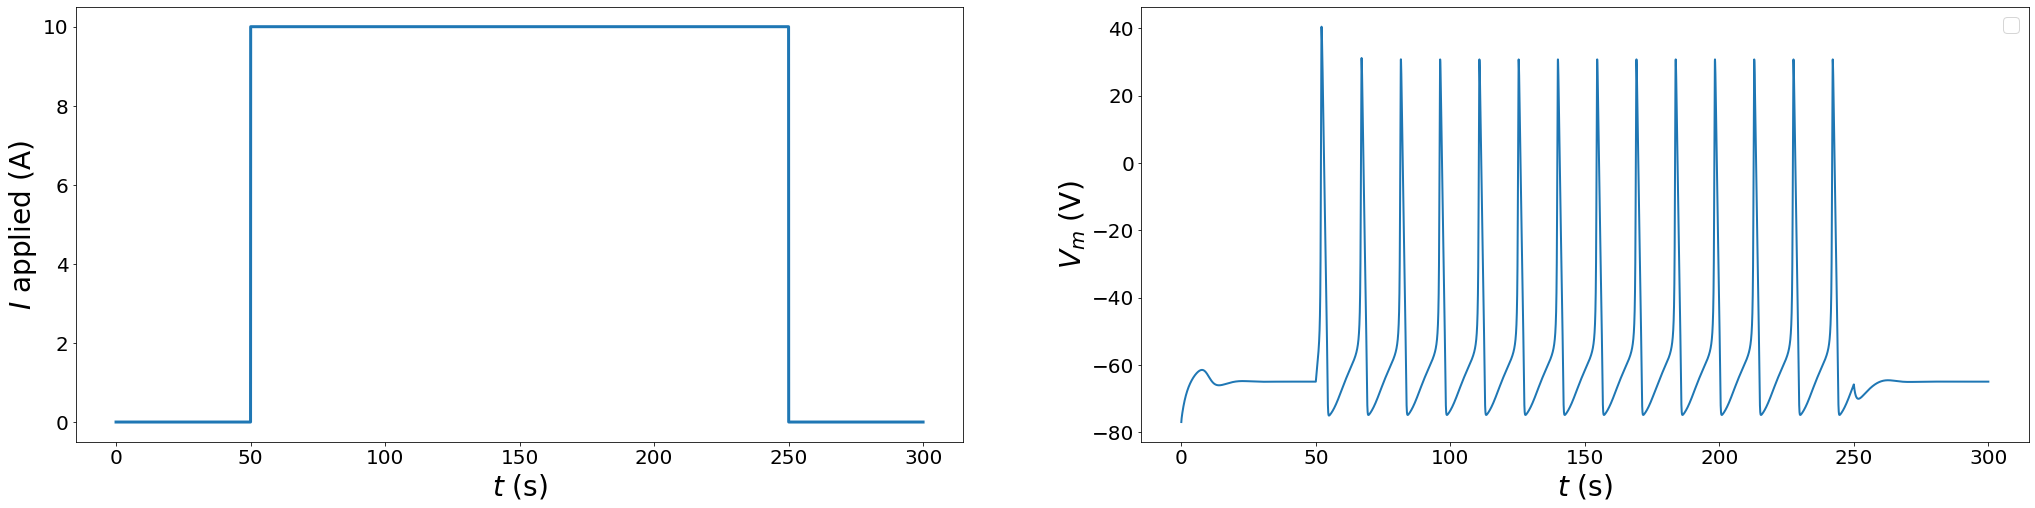

In [97]:
dt = .005
t = 300
time_abs = np.linspace(0,t,int(t/dt)+1)

def step_I(I0, time_abs=time_abs, t_min=20, t_max=100):
    I = I0*np.ones(int(t/dt)+1)
    I[time_abs<t_min] = 0
    I[time_abs>t_max] = 0
    return I

I0 = 10
t_min, t_max = 50, 250
Iapp = step_I(I0=I0,t_min=t_min,t_max=t_max)
V, m, h, n, spike_count = HH(t,dt,EK,Iapp)

fig, axes = plt.subplots(1,2,figsize=(35,8))
axes[0].plot(time_abs,Iapp,lw=3)
axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
axes[0].set_ylabel(r"$I$ applied (A)", fontsize=ax_fontsize)
axes[1].plot(time_abs,V,lw=2)
axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
axes[1].set_ylabel(r"$V_m$ (V)", fontsize=ax_fontsize)
axes[1].legend(fontsize=label_fontsize)
plt.show()

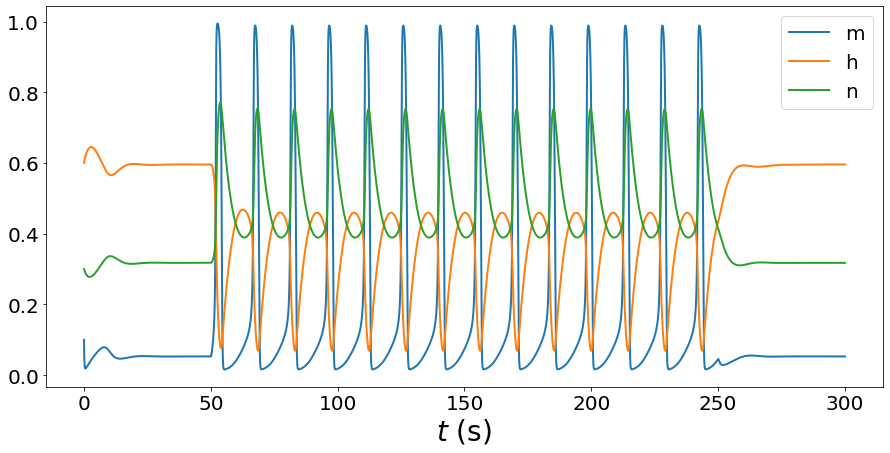

In [98]:
plt.plot(time_abs,m,lw=2,label="m")
plt.plot(time_abs,h,lw=2,label="h")
plt.plot(time_abs,n,lw=2,label="n")
plt.xlabel(r"$t$ (s)", fontsize=ax_fontsize)
plt.legend(fontsize=label_fontsize)
plt.show()

We can plot in a phase plane the dynamics of the system, for instance in $(n,V)$ coordinates. We obtain oscillations, which highlight the periodicity of the spikes.

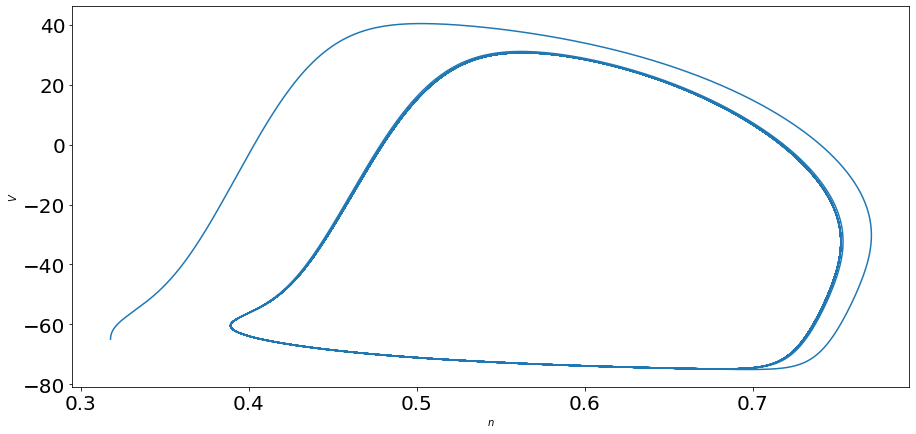

In [99]:
plt.plot(n[int(t_min/dt):int(t_max/dt)],V[int(t_min/dt):int(t_max/dt)])
plt.xlabel(r"$n$")
plt.ylabel(r"$V$")
plt.show()

The Hodgkin-Huxley model exhibits a type 2 bifurcation, with respect to the applied current. Below a specific current, there is no spiking and it directly goes to a high frequency.

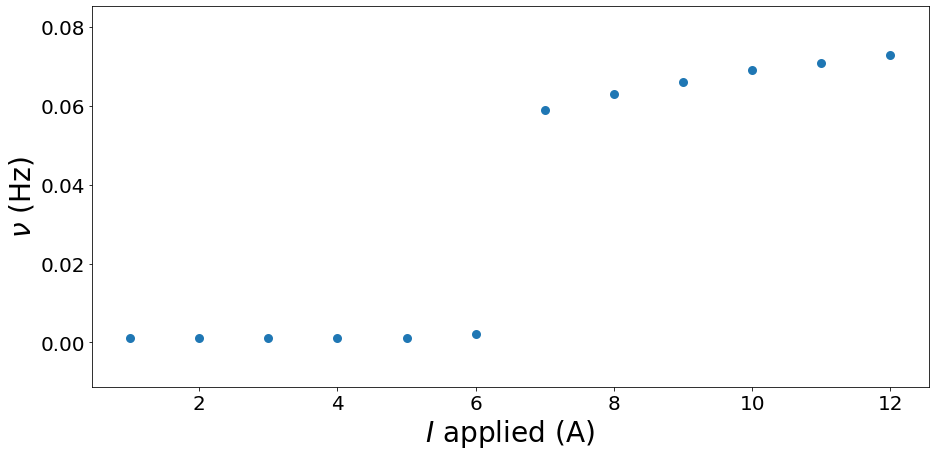

In [102]:
dt = .005
t = 1000
time_abs = np.linspace(0,t,int(t/dt)+1)

I0s = np.arange(1, 13)
rates = []
for I0 in I0s:
    V, m, h, n, spike_count = HH(t,dt,EK,I0*np.ones(len(time_abs)))
    rates.append(spike_count/t)
plt.scatter(I0s, rates,lw=3)
plt.xlabel(r"$I$ applied (A)", fontsize=ax_fontsize)
plt.ylabel(r"$\nu$ (Hz)", fontsize=ax_fontsize)
plt.show()

Even with subthreshold inputs the Hodgkin-Huxley model can exhibit spiking. In the following figure we highlight this phenomenon.

No handles with labels found to put in legend.


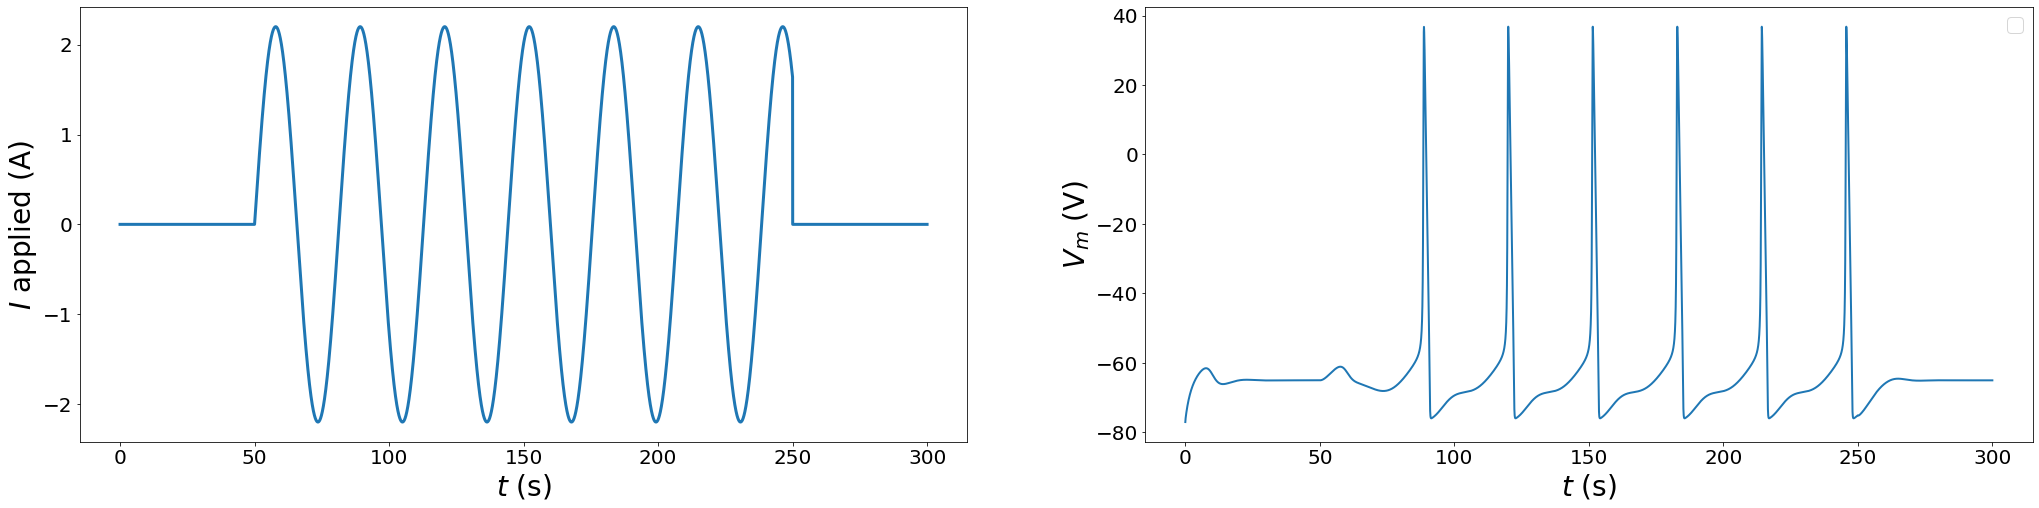

In [104]:
dt = .005
t = 300
time_abs = np.linspace(0,t,int(t/dt)+1)

def sin_I(I0, puls=.2, time_abs=time_abs, t_min=20, t_max=100):
    I = I0*np.sin(puls*(time_abs-t_min))
    I[time_abs<t_min] = 0
    I[time_abs>t_max] = 0
    return I

I0, puls = 2.2, .2
t_min, t_max = 50, 250
Iapp = sin_I(I0=I0,puls=puls,t_min=t_min,t_max=t_max)
V, m, h, n, spike_count = HH(t,dt,EK,Iapp)

fig, axes = plt.subplots(1,2,figsize=(35,8))
axes[0].plot(time_abs,Iapp,lw=3)
axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
axes[0].set_ylabel(r"$I$ applied (A)", fontsize=ax_fontsize)
axes[1].plot(time_abs,V,lw=2)
axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
axes[1].set_ylabel(r"$V_m$ (V)", fontsize=ax_fontsize)
axes[1].legend(fontsize=label_fontsize)
plt.show()